## house price prediction

#### dataset description


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015 (implies-- some renovations)                                                            |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Using the Pandas method <b>read_csv()</b> to load the data from the web address.


In [2]:
file_name = './data.csv'
df = pd.read_csv(file_name)

We're using the method <code>head</code> to display the first 5 columns of the dataframe.


In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Apart from the two features Unnamed and id, these features don't seem to be much effective in price prediction compared with other features:

1. yr_renovated
2. sqft_living15
3. sqft_lot15
4. view (possibly correlated with waterfront)

In [5]:
df.drop(columns=['Unnamed: 0' , 'id' , 'yr_renovated', 'sqft_living15' , 'sqft_lot15' , 'view'], inplace=True)

Using the method describe to obtain a statistical summary of the dataframe.


In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 2.6+ MB


# Module 2: Data Wrangling


In [8]:
df.isnull().any()

date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
dtype: bool

There are missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [9]:
print(f"number of NaN values for the column bedrooms are {df['bedrooms'].isnull().sum()}")
print(f"number of NaN values for the column bathrooms are {df['bathrooms'].isnull().sum()}")

number of NaN values for the column bedrooms are 13
number of NaN values for the column bathrooms are 10


Replacing the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [10]:
df["bedrooms"].fillna(df["bedrooms"].mean(), inplace=True)
df["bathrooms"].fillna(df["bathrooms"].mean(), inplace=True)
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
dtype: int64

Converting date values to numbers.

In [11]:
df['date'] = df['date'].astype(str).str[:4].astype(int)
df['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

# Module 3: Exploratory Data Analysis




Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


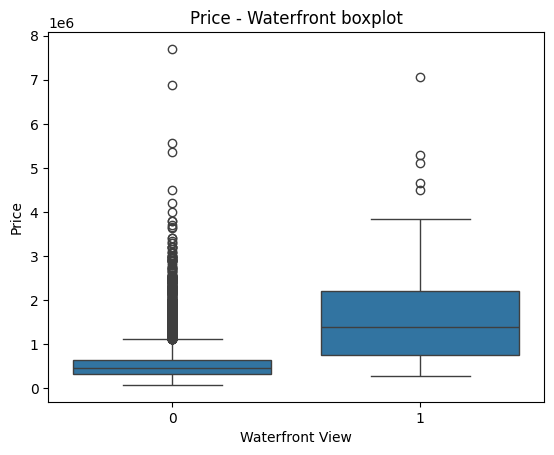

In [12]:
sns.boxplot(x="waterfront", y="price", data=df[["waterfront" , "price"]])
plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.title("Price - Waterfront boxplot")
plt.show()

1. Properties Without Waterfront View (0):

Median price: Approximately $450000.

Interquartile range (IQR): From around 320000 to $640000.

Outliers: Some individual points above the upper whisker.

2. Properties With Waterfront View (1):

Higher median price: Near $1.4 million.

IQR: From about 800000 to over $2 million.

Outliers: Also present above the upper whisker.

Using the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [13]:
correlation = df.select_dtypes(include=['number']).corr()['price'].abs()
correlation

date             0.003576
price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
zipcode          0.053203
lat              0.307003
long             0.021626
Name: price, dtype: float64

In [14]:
del correlation["price"]
print(f"The feature most correlated with price is {correlation.idxmax()} with a correlation of {max(correlation)}")

The feature most correlated with price is sqft_living with a correlation of 0.7020350546118005


# Module 4: Model Development


It is necessary to scale the target variable (y) since we're using a model that's sensitive to the scale of the target variable.

In [15]:
# split and standard the data in this place
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X , y = df.drop(columns = ["price"]) , df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.transform(y_test)


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import keras
from keras import backend as K


model = Sequential()
model.add(Dense(30, activation='relu', input_dim=15))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh', input_dim=15))
model.add(Dropout(0.2))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Module 5: Model Train


In [58]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


model.compile(optimizer="Adam" , loss='mean_squared_error' , metrics=[r2])


model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=64)


history = model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=64, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/200
271/271 [==============================] - 3s 4ms/step - loss: 0.2389 - r2: 0.7577
Epoch 2/200
271/271 [==============================] - 1s 5ms/step - loss: 0.2330 - r2: 0.7683
Epoch 3/200
271/271 [==============================] - 2s 6ms/step - loss: 0.2356 - r2: 0.7631
Epoch 4/200
271/271 [==============================] - 2s 6ms/step - loss: 0.2343 - r2: 0.7718
Epoch 5/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2306 - r2: 0.7631
Epoch 6/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2314 - r2: 0.7647
Epoch 7/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2303 - r2: 0.7699
Epoch 8/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2271 - r2: 0.7700
Epoch 9/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2344 - r2: 0.7643
Epoch 10/200
271/271 [==============================] - 1s 4ms/step - loss: 0.2322 - r2: 0.7670
Epoch 11/200
271/271 [===========================

# Module 6: Evaluate your model with test data

In [59]:
mse , r2 = model.evaluate(X_test_scaled, y_test_scaled)

print(f"R-squared (Coefficient of determination) is {r2}")
print(f'MSE on testing set is {mse}')

136/136 [==============================] - 1s 3ms/step - loss: 0.1879 - r2: 0.8397
R-squared (Coefficient of determination) is 0.8397089838981628
MSE on testing set is 0.18793003261089325


# Module 7: visualize your model

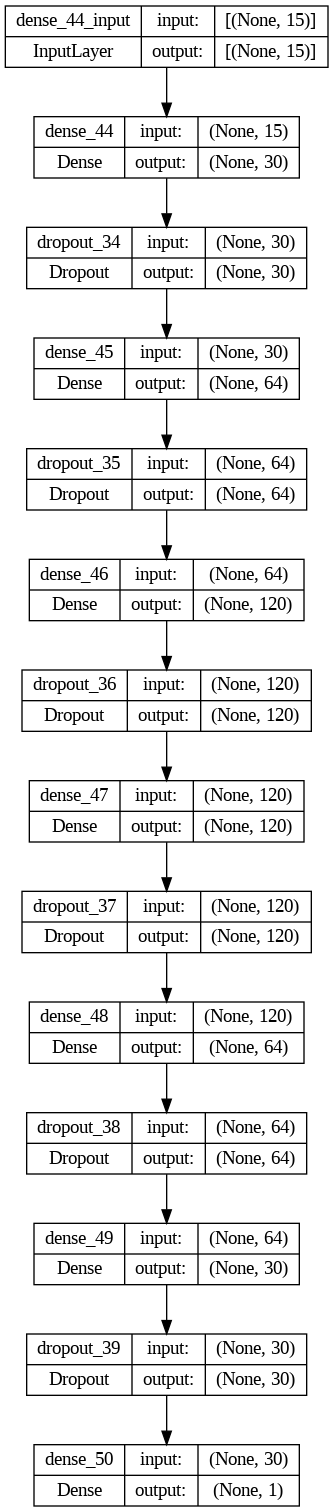

In [60]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

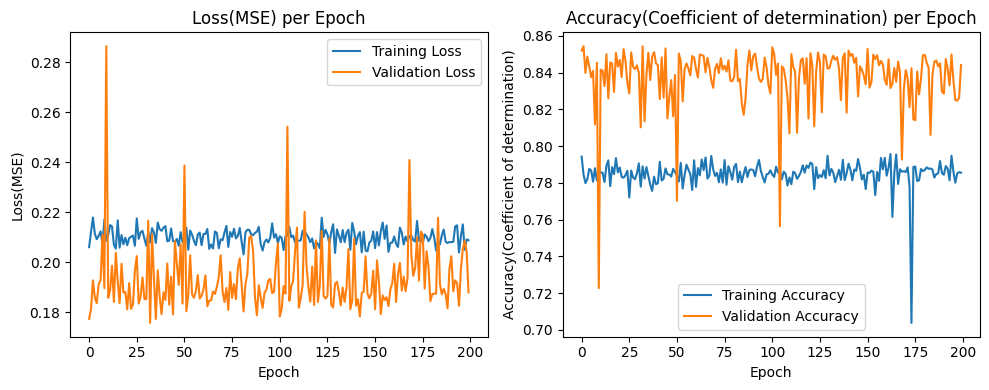

In [61]:
# MSE plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss(MSE)')
plt.title('Loss(MSE) per Epoch')
plt.legend()

# R2 plot
plt.subplot(1, 2, 2)
plt.plot(history.history['r2'], label='Training Accuracy')
plt.plot(history.history['val_r2'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(Coefficient of determination)')
plt.title('Accuracy(Coefficient of determination) per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Module 8

In [62]:
X , y = df[["waterfront" , "floors" , "sqft_living"]] , df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = sc.transform(y_test)

In [67]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=3))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh', input_dim=15))
model.add(Dropout(0.2))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer="Adam" , loss='mean_squared_error' , metrics=[r2])


model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=64)


history = model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=64, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/200
271/271 [==============================] - 3s 4ms/step - loss: 0.6324 - r2: 0.3380
Epoch 2/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5592 - r2: 0.4042
Epoch 3/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5363 - r2: 0.4176
Epoch 4/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5349 - r2: 0.4074
Epoch 5/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5324 - r2: 0.4285
Epoch 6/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5224 - r2: 0.4301
Epoch 7/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5126 - r2: 0.4320
Epoch 8/200
271/271 [==============================] - 2s 6ms/step - loss: 0.5101 - r2: 0.4224
Epoch 9/200
271/271 [==============================] - 2s 6ms/step - loss: 0.5112 - r2: 0.4363
Epoch 10/200
271/271 [==============================] - 1s 4ms/step - loss: 0.5006 - r2: 0.4545
Epoch 11/200
271/271 [===========================

In [68]:
mse , r2 = model.evaluate(X_test_scaled, y_test_scaled)

print(f"R-squared (Coefficient of determination) is {r2}")
print(f'MSE on testing set is {mse}')

136/136 [==============================] - 0s 2ms/step - loss: 0.4973 - r2: 0.3931
R-squared (Coefficient of determination) is 0.39309531450271606
MSE on testing set is 0.4972948431968689


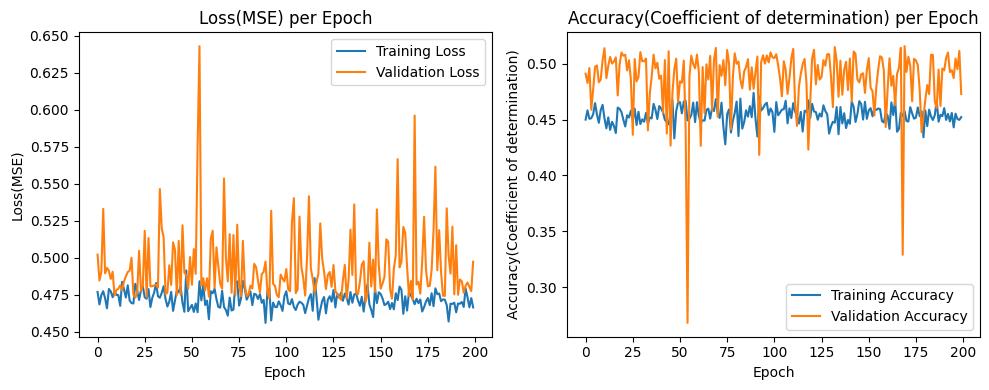

In [69]:
# MSE plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss(MSE)')
plt.title('Loss(MSE) per Epoch')
plt.legend()

# R2 plot
plt.subplot(1, 2, 2)
plt.plot(history.history['r2'], label='Training Accuracy')
plt.plot(history.history['val_r2'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(Coefficient of determination)')
plt.title('Accuracy(Coefficient of determination) per Epoch')
plt.legend()

plt.tight_layout()
plt.show()